# <span style="color:red"> Lezione 5 </span>

### <span style="color:black"> C++ code </span>

* 5.1
Il codice si basa sulla programmazione ad oggetti: 
    - `FunzBase3D.h` classe madre per le funzioni che hanno come input  una terna (x,y,z)
    - `random.h` oggetto che si occupa della generazioni di numeri random
    - `funzioni.h` oggetto in cui sono contenuti metodi utili (scrittura di file, inizializzazione rnd, minimo)
    - `hydro_....h` classi figle di `FunzBase3D.h` in cui sono contenute le specifiche distribuzioni di probalilità.
    - `metropolis.h` classe nella quale sono contenuti i due tipi di algoritmi di metropolis (uno con probabilità di transizione uniforme, l'altro gaussiana), metodi per medie a blocchi, set per la delta e start.
    
    Per i metodi `Algoritm_unif/gauss(int n, FunzBase3D& f, Random& rnd, vector<double>& x, vector<double>& y, vector<double>& z)` passo quindi: quanti step voglio fare (n), la distribuzione che voglio (quindi potenzialmente potrei usare una qualsiasi $\Psi_{n,l,m}(r,\theta,\phi)$), il generatore rnd, tre vector (x,y,z) sui quali verrano salvate tutte le posizioni 3D esplorate. Questi ultimi 3 vector vengono passati al metodo `coord_r(vector<double>& r, vector<double>& r_2, vector<double>& x, vector<double>& y, vector<double>& z, int L)` per estrarne $\left\langle r \right\rangle_{\Psi_{n,l,m}}$ calcolato su blocchi da L steps ciascuno (quindi il numero totale di blocchi sarà n/L).

## <span style="color:green"> Esercizio 5.1 </span>

### <span style="color:black">Python code </span>

Definisco funzioni per la lettura (tutti gli output del codice C++ sono contenuti nella directory `data`) e per i plot 3D e 2D. I file di output da cui sono caricati i dati sono composti da:
* distribuzione 3D (`hydro_...dat`)

1° colonna|2° colonna|3° colonna
----------|----------|----------
X|Y|Z

* stime di $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ e $\left\langle r \right\rangle_{\Psi_{2,1,0}}$</span> (`r_...dat`)

1° colonna|2° colonna|3° colonna
----------|----------|----------
numero del blk|stima r blk|incert r blk

In [8]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

def read(filename):
    X, Y, Z = np.loadtxt(f"5.1/data/"+filename+".dat",\
                        usecols=(0,1,2), delimiter=' ', unpack='true')
    return X, Y, Z
# plot 3D
def plot_3D(filename):
    X, Y, Z = read(filename)
    fig = plt.figure(figsize=(10,8))
    ax = Axes3D(fig)
    ax.scatter(X, Y, Z, c=Z, marker='.')
    ax.set_title(''+filename)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.view_init(10, 30)
    plt.show()

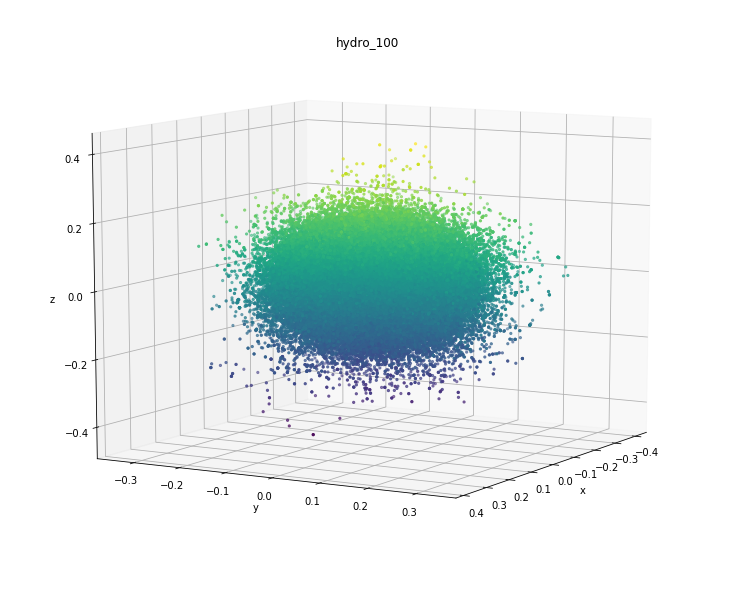

In [9]:
# 100 unif
plot_3D("hydro_100")

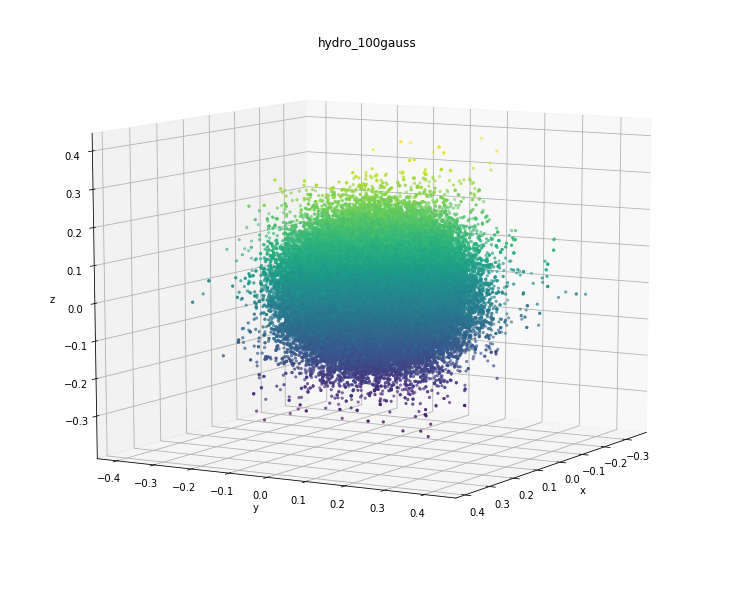

In [10]:
# 100 gauss
plot_3D("hydro_100gauss")

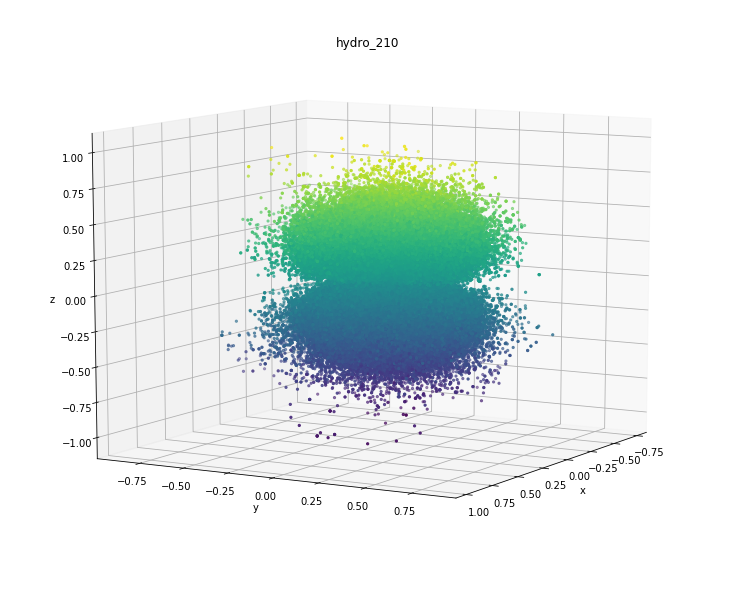

In [11]:
# 210 unif
plot_3D("hydro_210")

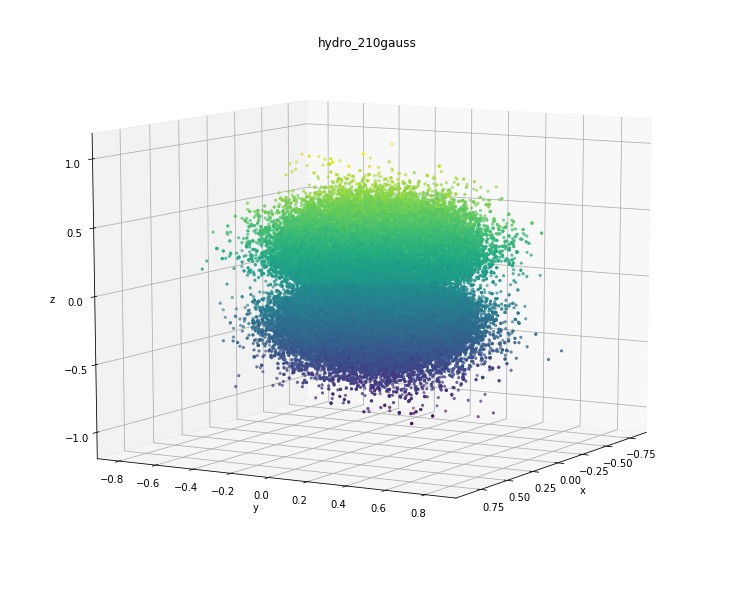

In [12]:
# 210 gauss
plot_3D("hydro_210gauss")

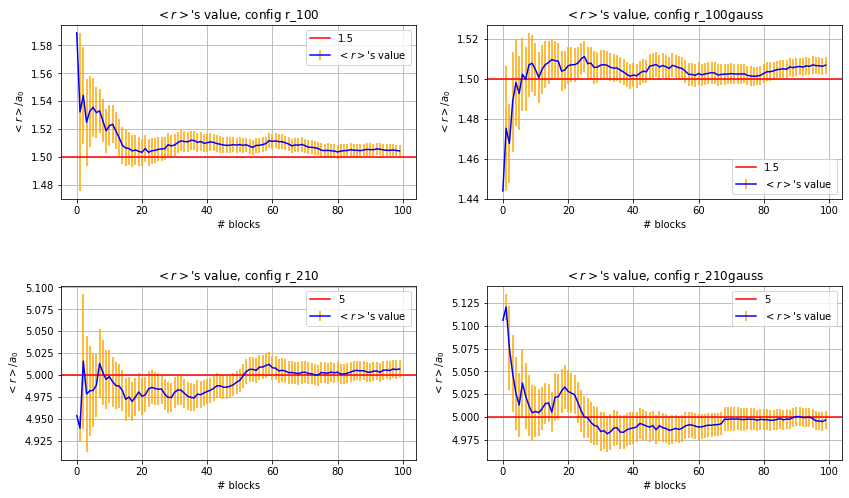

In [24]:
fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(14,8),gridspec_kw=dict(wspace=0.2, hspace=0.5))
# useful parameters
filenames = ['r_100','r_100gauss','r_210','r_210gauss']
rm = [3/2,5]
a_0 = 0.0529
h=0
for i in range(2):
    for j in range(2):
        x, r, error = read(''+filenames[h])
        r /= a_0
        error /= a_0
        ax[i,j].errorbar(x,r,color='blue',yerr=error,ecolor='orange', label=f'$<r>$\'s value')
        ax[i,j].axhline(y=+rm[i], color='r', linestyle='-', label= f'{rm[i]}')
        ax[i,j].set_xlabel('# blocks')
        ax[i,j].set_ylabel(f'$<r>/a_0$')
        ax[i,j].set_title(f'$<r>$\'s value, config '+filenames[h])
        ax[i,j].legend()
        ax[i,j].grid(True)
        h+=1
plt.show()